Matt Dwyer (mdd328)

Total points for this HW: 100.

Please note: Copying and pasting other people's work is absolutely prohibited.  Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

### Question 1: Accuracy and interpretability (10 pts)

a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3 pts)

    Interpretability is important when an industry is highly regulated and in need of checks and approvals. With the potential legal ramifications of what would happen if an alogorithm were to arrive at an incorrect conclusion, such an algorithm would need to be well understood and explainable to many different stakeholders.

    For instance, if the city were looking at building and demographic information to determine where to send building inspectors, the leading agency would need to know how such an algorithm works in order to explain  why some buildings were inspected and some were not if public safety incidents occur. 

b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3 pts)

    Interpretability would be less important in cases where decision making is more in house and less under scrutiny of governing bodies. For instance, if a ride sharing company were trying to predict which areas to send their drivers to maximize revenue, a more accurate model would be preferable to an interpretable one, as the stakeholders invovled would care about the revenue, and the consequences would not be as drastic as damaging to public safety.

c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4 pts)

    One way to achieve both accuracy and interpretability is to learn a single tree on the output of a forest. Because it is a single tree, the decision making process will be more interpretable than a random forest. It will also be able to retain most of the accuracy gains from the forest, as the tree will be trained on examples classified by the forest along with the original example data (Domingos, 1998).

###  Question 2: Build a decision tree for classification, step by step, following the lecture notes. Note that the dataset has been slightly modified, so you will get a different tree than the one shown in the lecture notes.  (30 points)

In [34]:
import pandas as pd
import numpy as np

In [35]:
from io import StringIO
thefile = StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\nbad,4,93,light')
df = pd.read_csv(thefile)
df

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium
5,bad,4,94,light
6,bad,4,95,light
7,bad,8,139,weighty
8,bad,8,190,weighty
9,bad,8,145,weighty


### Please use numpy and pandas to do the computation for parts a) through f).  Do not use an existing decision tree implementation like sklearn for this question.

a) Start with the entire dataset and find the most common MPG value. (2 pts)

In [36]:
df['MPG'].mode()[0]

'bad'

In [37]:
def InformationGain(goodY,badY,goodN,badN):
    def F(X,Y):
        val1 = X*np.log2(1.*(X+Y)/X) if X>0 else 0
        val2 = Y*np.log2(1.*(X+Y)/Y) if Y>0 else 0
        return val1+val2
    return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)

b) Enumerate all the possible binary questions you could ask for each discrete-valued variable.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts)

In [38]:
# Weight variable

good_Light = (df['MPG'][df['weight'] == 'light'] == 'good').sum()
bad_Light = (df['MPG'][df['weight'] == 'light'] == 'bad').sum()
good_NotLight = (df['MPG'][df['weight'] != 'light'] == 'good').sum()
bad_NotLight = (df['MPG'][df['weight'] != 'light'] == 'bad').sum()

print("Information gain from weight is light decision:",InformationGain(good_Light,bad_Light,good_NotLight,bad_NotLight))

good_Medium = (df['MPG'][df['weight'] == 'medium'] == 'good').sum()
bad_Medium = (df['MPG'][df['weight'] == 'medium'] == 'bad').sum()
good_NotMedium = (df['MPG'][df['weight'] != 'medium'] == 'good').sum()
bad_NotMedium = (df['MPG'][df['weight'] != 'medium'] == 'bad').sum()

print("Information gain from weight is medium decision:",InformationGain(good_Medium,bad_Medium,good_NotMedium,bad_NotMedium))

good_Weighty = (df['MPG'][df['weight'] == 'weighty'] == 'good').sum()
bad_Weighty = (df['MPG'][df['weight'] == 'weighty'] == 'bad').sum()
good_NotWeighty = (df['MPG'][df['weight'] != 'weighty'] == 'good').sum()
bad_NotWeighty = (df['MPG'][df['weight'] != 'weighty'] == 'bad').sum()

print("Information gain from weight is weighty decision:",InformationGain(good_Weighty,bad_Weighty,good_NotWeighty,bad_NotWeighty))



Information gain from weight is light decision: 0.0971071794515
Information gain from weight is medium decision: 0.0
Information gain from weight is weighty decision: 0.15307795339


In [39]:
# Cylinder variable

good_4 = (df['MPG'][df['cylinders'] == 4] == 'good').sum()
bad_4 = (df['MPG'][df['cylinders'] == 4] == 'bad').sum()
good_Not4 = (df['MPG'][df['cylinders'] != 4] == 'good').sum()
bad_Not4 = (df['MPG'][df['cylinders'] != 4] == 'bad').sum()

print("Information gain from 4 cylinders decision:",InformationGain(good_4,bad_4,good_Not4,bad_Not4))

good_6 = (df['MPG'][df['cylinders'] == 6] == 'good').sum()
bad_6 = (df['MPG'][df['cylinders'] == 6] == 'bad').sum()
good_Not6 = (df['MPG'][df['cylinders'] != 6] == 'good').sum()
bad_Not6 = (df['MPG'][df['cylinders'] != 6] == 'bad').sum()

print("Information gain from 6 cylinders decision:",InformationGain(good_6,bad_6,good_Not6,bad_Not6))

good_8 = (df['MPG'][df['cylinders'] == 8] == 'good').sum()
bad_8 = (df['MPG'][df['cylinders'] == 8] == 'bad').sum()
good_Not8 = (df['MPG'][df['cylinders'] != 8] == 'good').sum()
bad_Not8 = (df['MPG'][df['cylinders'] != 8] == 'bad').sum()

print("Information gain from 8 cylinders decision:",InformationGain(good_8,bad_8,good_Not8,bad_Not8))


Information gain from 4 cylinders decision: 0.365293897532
Information gain from 6 cylinders decision: 0.15307795339
Information gain from 8 cylinders decision: 0.122556248918


c) Enumerate all the possible binary questions you could ask for the real-valued variable HP.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts) 

NOTE: if you'd like, you can just use all midpoints between consecutive values of the sorted HP attribute.  You are not required to exclude provably suboptimal questions like we did in the lecture.

In [40]:
hp_values = sorted(df['HP'].unique().tolist(), key=int)

for i in hp_values:
    goodY = (df['MPG'][df['HP'] >= i] == 'good').sum()
    badY = (df['MPG'][df['HP'] >= i] == 'bad').sum()
    goodN = (df['MPG'][df['HP'] < i] == 'good').sum()
    badN = (df['MPG'][df['HP'] < i] == 'bad').sum()
    
    print("Information gain from an HP of",i,"is", InformationGain(goodY,badY,goodN,badN))

Information gain from an HP of 65 is 0.0
Information gain from an HP of 75 is 0.105914933394
Information gain from an HP of 81 is 0.226257944976
Information gain from an HP of 85 is 0.367102656103
Information gain from an HP of 89 is 0.214170945008
Information gain from an HP of 90 is 0.365776599471
Information gain from an HP of 92 is 0.275926745594
Information gain from an HP of 93 is 0.509185925461
Information gain from an HP of 94 is 0.429504523289
Information gain from an HP of 95 is 0.365293897532
Information gain from an HP of 100 is 0.223356870468
Information gain from an HP of 110 is 0.15307795339
Information gain from an HP of 139 is 0.122556248918
Information gain from an HP of 145 is 0.0944475384315
Information gain from an HP of 170 is 0.0683942335509
Information gain from an HP of 175 is 0.0441134636746
Information gain from an HP of 190 is 0.0213774558499


In [41]:
goodY = (df['MPG'][df['HP'] >= 93] == 'good').sum()
badY = (df['MPG'][df['HP'] >= 93] == 'bad').sum()

goodN = (df['MPG'][df['HP'] < 93] == 'good').sum()
badN = (df['MPG'][df['HP'] < 93] == 'bad').sum()
print('Yes results to over > 93 HP?:',goodY,'and',badY)
print('No results to over > 93 HP?:',goodN,'and',badN)

Yes results to over > 93 HP?: 0 and 13
No results to over > 93 HP?: 5 and 2


d) Based on your results for parts b and c, what is the optimal binary split of the data?  Of the two child nodes created by this split, which (if any) would require further partitioning? (4 pts)

    Part c showed the greatest information gain came from asking whether the HP is above 93. Further, the no results is not fully seperated, requiring further partitioning. 

e) Repeat parts a through d until all training data points are perfectly classified by the resulting tree. (6 pts)

In [42]:
result_df = df[df['HP'] < 93]
result_df

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
11,good,4,92,medium
14,good,4,89,medium
15,good,4,65,light
16,bad,6,85,medium
17,good,4,81,light


In [43]:
good2_4 = (result_df['MPG'][result_df['cylinders'] == 4] == 'good').sum()
bad2_4 = (result_df['MPG'][result_df['cylinders'] == 4] == 'bad').sum()
good2_Not4 = (result_df['MPG'][result_df['cylinders'] != 4] == 'good').sum()
bad2_Not4 = (result_df['MPG'][result_df['cylinders'] != 4] == 'bad').sum()

print("Information gain from 8 cylinders decision:",InformationGain(good2_4,bad2_4,good2_Not4,bad2_Not4))

Information gain from 8 cylinders decision: 0.863120568567


f) Draw or show the final decision tree in a format of your choice.  The decision to make at each step and the predicted value at each leaf node must be clear. (4 pts)

                          (( Is the HP > 93? ))
                      yes /                   \ no
                         /                     \
                    (( Bad ))               (( Are there 4 cylinders? ))
                                        yes /                          \ no
                                           /                            \
                                    (( Good ))                        (( Bad ))

g) Classify each of the following four vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  Do this by hand using the tree structure learned in part f. (4 pts)

?,8,70,light

        1. Is the HP > 93?         --No
        2. Is the cylinders = 4?   --No
        Conclusion: Bad

?,6,113,medium

        1. Is the HP > 93?         --Yes
        Conclusion: Bad

?,4,83,weighty

        1. Is the HP > 93?         --No
        2. Is the cylinders = 4?   --Yes
        Conclusion: Good

?,4,95,weighty

        1. Is the HP > 93?         --Yes
        Conclusion: Bad


### Question 3, Predicting burden of disease （40 pts)

In [44]:
data=pd.read_csv("Burden of diarrheal illness by country.csv")
data.head(3)

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high


### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

BurdenOfDisease: Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features with sklearn.tree.DecisionTreeClassifier. 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

a) Please choose a train/test split and choose a hyper-parameter governing model simplicity, for example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier (using the training set) for different values of this parameter and for each such value, record the corresponding classification accuracy on the test set. (10 pts)

In [45]:
data = data.replace({'awful': 0, 'low': 1, 'medium': 2, 'high': 3})

In [46]:
data.columns

Index(['Country', 'FrxnPeaceIn10', 'ODA4H2OPcptaDol', 'RenewResm3PcptaYr',
       'SustAccImprWatRur', 'SustAccImprWatUrb', 'SustAccImprSanRur',
       'SustAccImprSanUrb', 'TotHlthExpPctofGDP', 'GenGovtPctofTotHlthExp',
       'ExtResHlthPctTotExpHlth', 'PCptaGovtExpHlthAvgExcRt', 'GDPPCptaIntDol',
       'AdultLtrcyRate', 'FemaleLtrcyRate', 'BurdenOfDisease'],
      dtype='object')

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# remove records with any missing values
data=data.dropna()

# target variable. 
y=data.loc[:,"BurdenOfDisease"]

# Get the feature space
X=data.loc[:,"FrxnPeaceIn10":"FemaleLtrcyRate"]
#X=pd.get_dummies(X)

# Split data into 70% train, 30% test
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)
print (X_train.head())

    FrxnPeaceIn10  ODA4H2OPcptaDol  RenewResm3PcptaYr  SustAccImprWatRur  \
7             1.0             0.00                 66            0.85149   
53            1.0             8.04             317000            0.82178   
15            1.0             4.19               9345            0.89109   
36            0.4             0.12              25183            0.28713   
12            1.0             2.87              45564            0.59406   

    SustAccImprWatUrb  SustAccImprSanRur  SustAccImprSanUrb  \
7             0.97030            0.99010            0.99010   
53            0.82178            0.59406            0.85149   
15            0.99010            0.24752            0.56436   
36            0.82178            0.22772            0.42574   
12            0.85149            0.69307            0.64356   

    TotHlthExpPctofGDP  GenGovtPctofTotHlthExp  ExtResHlthPctTotExpHlth  \
7                0.064                   0.475                    0.002   
53            

In [48]:
print (X.shape)
print (y.shape)

(130, 14)
(130,)


In [49]:
OS = []

for i in range(1,11):
    dt = DecisionTreeClassifier(random_state = 999,max_depth = i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = i)
    dt.fit(X_train,y_train)
    OS.append(dt.score(X_test,y_test))
    print ('Out of sample accuracy for depth',i,':',dt.score(X_test,y_test))

Out of sample accuracy for depth 1 : 0.326923076923
Out of sample accuracy for depth 2 : 0.480769230769
Out of sample accuracy for depth 3 : 0.653846153846
Out of sample accuracy for depth 4 : 0.557692307692
Out of sample accuracy for depth 5 : 0.461538461538
Out of sample accuracy for depth 6 : 0.653846153846
Out of sample accuracy for depth 7 : 0.596153846154
Out of sample accuracy for depth 8 : 0.596153846154
Out of sample accuracy for depth 9 : 0.5
Out of sample accuracy for depth 10 : 0.519230769231


b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy. (10 pts)

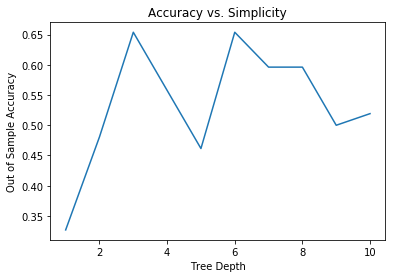

In [50]:
import matplotlib.pylab as plt

plt.plot(range(1,11),OS)
plt.xlabel('Tree Depth')
plt.ylabel('Out of Sample Accuracy')
plt.title('Accuracy vs. Simplicity')
plt.show()

c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use the GridSearchCV package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the out of sample accuracy after tuning the hyper-parameter? (10 pts)

In [51]:
param_grid = {'max_depth':range(1,11)}

dt = DecisionTreeClassifier(random_state = 999)
gs=GridSearchCV(dt,param_grid=param_grid,scoring='accuracy')
rs=gs.fit(X_train,y_train)
pred=rs.predict_proba(X_test)[:,1]
print(rs.best_params_)
print(accuracy_score(np.array(y_test),pred.round()))

{'max_depth': 5}
0.365384615385


d) Visualize a simple decision tree (e.g., with max_depth = 2 or 3) learned from the data.  To do so, given your decision tree dt, you can use the code below, then copy and paste the resulting output into http://www.webgraphviz.com.  Alternatively, if you have graphviz installed on your machine, you can use that. (5 pts)

In [52]:
from sklearn import tree

dt = DecisionTreeClassifier(max_depth=3) 
dt.fit(X_train,y_train)

thestring=tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=dt.classes_.astype('str'),  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
print(thestring)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="GDPPCptaIntDol <= 2349.5, samples = 78, value = [20, 20, 16, 22], class = 3", fillcolor="#d739e509"] ;
1 [label="SustAccImprSanRur <= 0.4208, samples = 34, value = [20, 0, 0, 14], class = 0", fillcolor="#e581394d"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="ExtResHlthPctTotExpHlth <= 0.027, samples = 28, value = [20, 0, 0, 8], class = 0", fillcolor="#e5813999"] ;
1 -> 2 ;
3 [label="samples = 4, value = [0, 0, 0, 4], class = 3", fillcolor="#d739e5ff"] ;
2 -> 3 ;
4 [label="samples = 24, value = [20, 0, 0, 4], class = 0", fillcolor="#e58139cc"] ;
2 -> 4 ;
5 [label="samples = 6, value = [0, 0, 0, 6], class = 3", fillcolor="#d739e5ff"] ;
1 -> 5 ;
6 [label="GDPPCptaIntDol <= 8204.5, samples = 44, value = [0, 20, 16, 8], class = 1", fillcolor="#47e53924"] ;
0 -> 6 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
7 [label="Fe

### Question 4, Fit a random forest to the data from question 3 (20 pts)

a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 3c). (10 pts)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(max_depth=3)
rf.fit(X_train, y_train)
pred=rf.predict_proba(X_test)[:,1]
print (accuracy_score(y_test,pred.round()))

0.442307692308


b) Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10 pts)

    The results of the decision tree was an accuracy score of 0.36. While this was not high, the tree was highly interpretable, as with the limitation to a depth of three, graphviz displayed an easy to follow set of decisions. The tree begins by checking if the GDP of the country is over a certain threshold, and asks 3 more levels of questions to determine the class of burden of disease for a country, ranging from 0 to 4, or awful, low, medium, and high. The random forest model output an accuracy score of 0.44, a considerable improvement on the decision tree method in being able to accurately predict burden of disease. However, as this random forest is an ensemble method that averages predictors, understanding how the forest arrives to each specific classification is a much more complex question than going through a single tree.